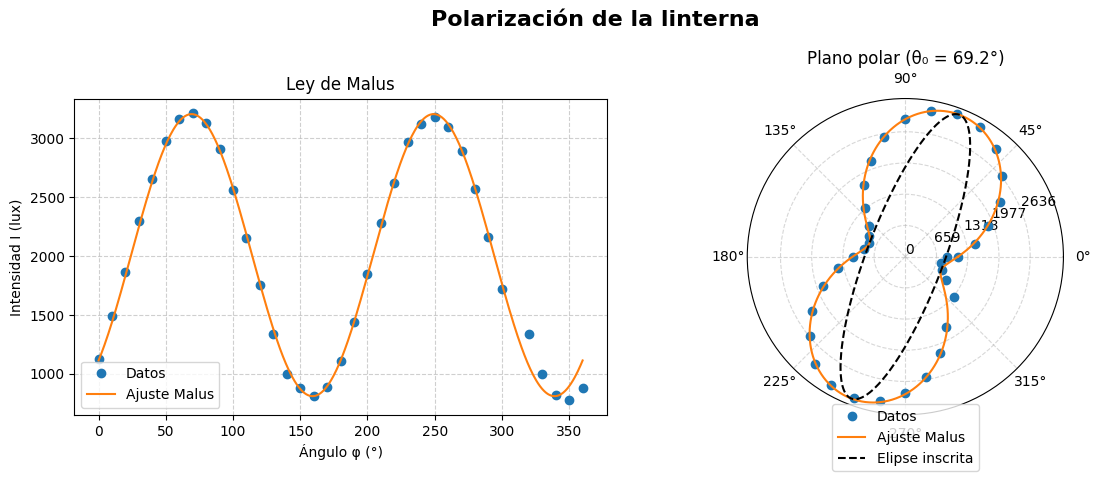

I₀ (máxima): 2396.57 lux
θ₀: 69.16°
Fondo (mínimo): 809.42 lux
Excentricidad: 0.968


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Leer datos ===
data = np.genfromtxt("data.txt", skip_header=1, missing_values='--', filling_values=np.nan)
ángulos = data[:, 4]
intensidades = data[:, 5]

# Filtrar valores válidos
valid = ~np.isnan(ángulos) & ~np.isnan(intensidades)
ángulos = ángulos[valid]
intensidades = intensidades[valid]

# === Modelo de Ley de Malus ===
def malus(θ, I0, θ0, fondo):
    return I0 * np.cos(np.deg2rad(θ - θ0))**2 + fondo

# Ajuste
params, _ = curve_fit(
    malus, ángulos, intensidades,
    p0=[max(intensidades), 0, min(intensidades)],
    bounds=([0, -180, 0], [np.inf, 180, np.inf])
)
I0, θ0, fondo = params

ángulos_fit = np.linspace(0, 360, 500)
intensidades_fit = malus(ángulos_fit, I0, θ0, fondo)

# === Gráfica ===
fig = plt.figure(figsize=(12, 5))
fig.suptitle("Polarización de la linterna", fontsize=16, fontweight='bold')
# --- Cartesiana ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(ángulos, intensidades, 'o', label="Datos", color="#1f77b4")
ax1.plot(ángulos_fit, intensidades_fit, '-', label="Ajuste Malus", color="#ff7f0e")
ax1.set_xlabel("Ángulo φ (°)")
ax1.set_ylabel("Intensidad I (lux)")
ax1.set_title("Ley de Malus")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.legend()

# --- Polar (sin normalizar) ---
ax2 = fig.add_subplot(1, 2, 2, polar=True)
áng_rad = np.deg2rad(ángulos)
áng_fit_rad = np.deg2rad(ángulos_fit)

ax2.plot(áng_rad, intensidades, 'o', label="Datos", color="#1f77b4")
ax2.plot(áng_fit_rad, intensidades_fit, '-', label="Ajuste Malus", color="#ff7f0e")

# === Elipse inscrita ===
a = I0+fondo    # semieje mayor (máximo de intensidad)
b = fondo  # semieje menor (mínimo de intensidad)
ψ = np.deg2rad(θ0)

t = np.linspace(0, 2*np.pi, 400)
x = a * np.cos(t)
y = b * np.sin(t)

# Rotar
x_rot = x * np.cos(ψ) - y * np.sin(ψ)
y_rot = x * np.sin(ψ) + y * np.cos(ψ)

# Convertir a coordenadas polares reales
r_elipse = np.sqrt(x_rot**2 + y_rot**2)
θ_elipse = np.arctan2(y_rot, x_rot)

# Graficar la elipse
ax2.plot(θ_elipse, r_elipse, '--', color='black', label="Elipse inscrita")

# Estética
ax2.set_title(f"Plano polar (θ₀ = {θ0:.1f}°)")
ax2.set_rticks(np.linspace(0, I0*1.1, 5))
ax2.grid(True, linestyle="--", alpha=0.5)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2))

plt.tight_layout()
plt.show()

# === Resultados ===
print(f"I₀ (máxima): {I0:.2f} lux")
print(f"θ₀: {θ0:.2f}°")
print(f"Fondo (mínimo): {fondo:.2f} lux")
print(f"Excentricidad: {np.sqrt(1 - (b / a)**2):.3f}")


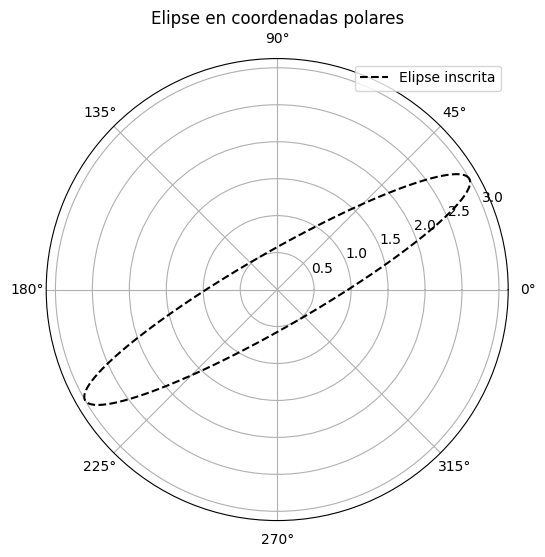

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la elipse
a = 3.0  # semieje mayor
b = .5  # semieje menor
ψ = np.deg2rad(30)  # orientación de la elipse

# Parámetro t (ángulo elíptico)
t = np.linspace(0, 2*np.pi, 500)

# Coordenadas elípticas en cartesianas
x = a * np.cos(t)
y = b * np.sin(t)

# Rotación por ψ
x_rot = x * np.cos(ψ) - y * np.sin(ψ)
y_rot = x * np.sin(ψ) + y * np.cos(ψ)

# Conversión a coordenadas polares
r = np.sqrt(x_rot**2 + y_rot**2)
theta = np.arctan2(y_rot, x_rot)

# Graficar
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, polar=True)
ax.plot(theta, r, 'k--', label='Elipse inscrita')
ax.set_title("Elipse en coordenadas polares")
ax.legend(loc='upper right')
plt.show()


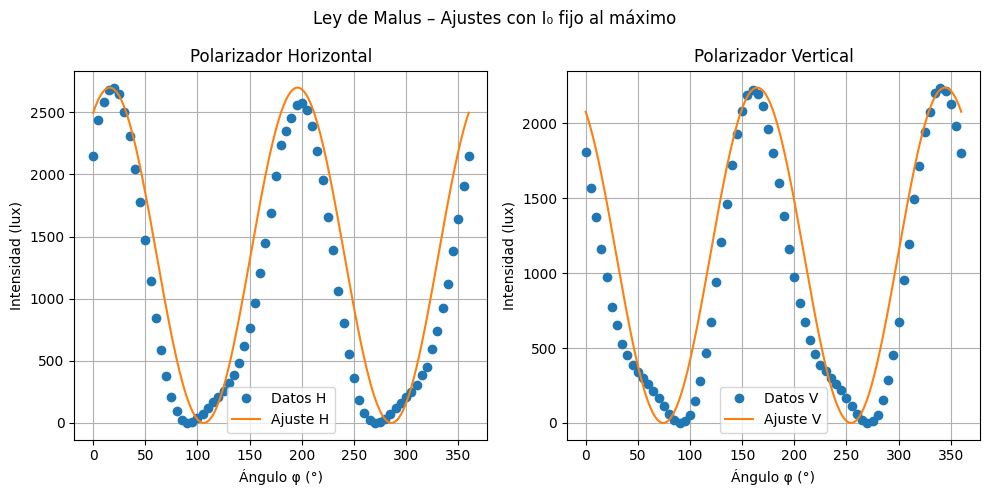

== Polarizador Horizontal ==
I₀ (fijo): 2698.00 lux
θ₀: 15.89°
Fondo: 0.00 lux

== Polarizador Vertical ==
I₀ (fijo): 2239.00 lux
θ₀: -15.57°
Fondo: 0.00 lux


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Cargar los datos desde el archivo
data = np.genfromtxt("data.txt", skip_header=1, missing_values='--', filling_values=np.nan)

# Columnas:
# Ley de Malus con sensor de intensidad
# Primer polarizador horizontal
φH = data[:, 0]
IH = data[:, 1]
# Primer polarizador vertical
φV = data[:, 2]
IV = data[:, 3]

# Filtrar datos válidos (sin NaN)
valid_H = ~np.isnan(φH) & ~np.isnan(IH)
φH = φH[valid_H]
IH = IH[valid_H]

valid_V = ~np.isnan(φV) & ~np.isnan(IV)
φV = φV[valid_V]
IV = IV[valid_V]

# Función modelo (Ley de Malus con fondo constante)
def malus(θ, I0, θ0, fondo):
    rad = np.deg2rad(θ - θ0)
    return I0 * np.cos(rad)**2 + fondo

# Límites físicos: I0 ≥ 0, fondo ≥ 0
bounds = ([0, -180, 0], [np.inf, 180, np.inf])

# Ajuste horizontal
popt_H, _ = curve_fit(malus, φH, IH, p0=[max(IH), 0, min(IH)], bounds=bounds)
I0_H, θ0_H, fondo_H = popt_H
φH_fit = np.linspace(min(φH), max(φH), 500)
IH_fit = malus(φH_fit, *popt_H)

# Ajuste vertical
popt_V, _ = curve_fit(malus, φV, IV, p0=[max(IV), 0, min(IV)], bounds=bounds)
I0_V, θ0_V, fondo_V = popt_V
φV_fit = np.linspace(min(φV), max(φV), 500)
IV_fit = malus(φV_fit, *popt_V)

# Graficar
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(φH, IH, 'o', label='Datos H')
plt.plot(φH_fit, IH_fit, '-', label='Ajuste H')
plt.xlabel("Ángulo φ (°)")
plt.ylabel("Intensidad (lux)")
plt.title("Polarizador Horizontal")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(φV, IV, 'o', label='Datos V')
plt.plot(φV_fit, IV_fit, '-', label='Ajuste V')
plt.xlabel("Ángulo φ (°)")
plt.ylabel("Intensidad (lux)")
plt.title("Polarizador Vertical")
plt.grid(True)
plt.legend()

plt.suptitle("Ley de Malus – Ajustes con fondo físico")
plt.tight_layout()
plt.show()

# Mostrar parámetros
print("== Polarizador Horizontal ==")
print(f"I₀: {I0_H:.2f} lux")
print(f"θ₀: {θ0_H:.2f}°")
print(f"Fondo: {fondo_H:.2f} lux\n")

print("== Polarizador Vertical ==")
print(f"I₀: {I0_V:.2f} lux")
print(f"θ₀: {θ0_V:.2f}°")
print(f"Fondo: {fondo_V:.2f} lux")
